In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
df['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp']

0     2016-03-27 00:53:11
1     2016-04-04 01:39:02
2     2016-03-13 20:35:42
3     2016-01-10 02:31:19
4     2016-06-03 03:36:18
              ...        
995   2016-02-11 21:49:00
996   2016-04-22 02:07:01
997   2016-02-01 17:24:57
998   2016-03-24 02:35:54
999   2016-06-03 21:43:21
Name: Timestamp, Length: 1000, dtype: datetime64[ns]

In [7]:
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

In [8]:
df.drop(columns=['Ad Topic Line', 'City', 'Country', 'Timestamp'], inplace=True)

In [9]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,0
1,80.23,31,68441.85,193.77,1,0,4,4,1
2,69.47,26,59785.94,236.50,0,0,3,13,20
3,74.15,29,54806.18,245.89,1,0,1,10,2
4,68.37,35,73889.99,225.58,0,0,6,3,3


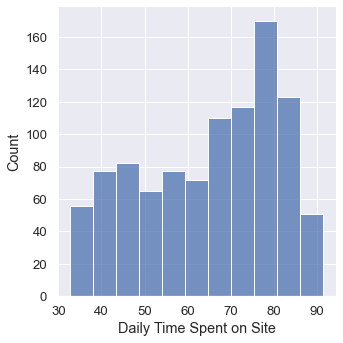

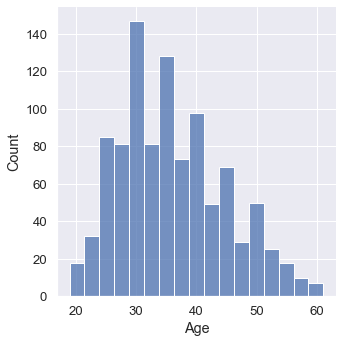

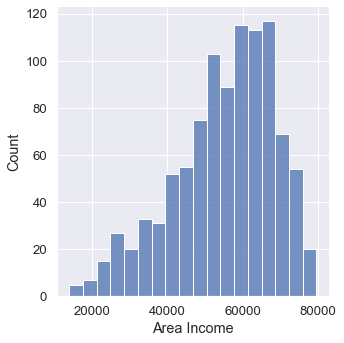

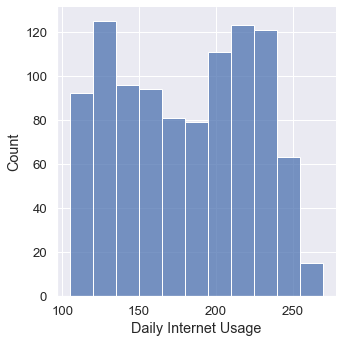

In [10]:
for col in df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]:
    sns.displot(df[col])
    plt.show()

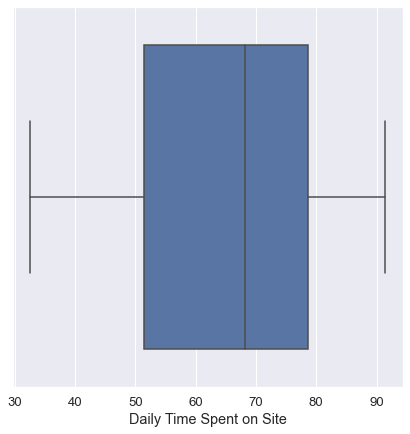

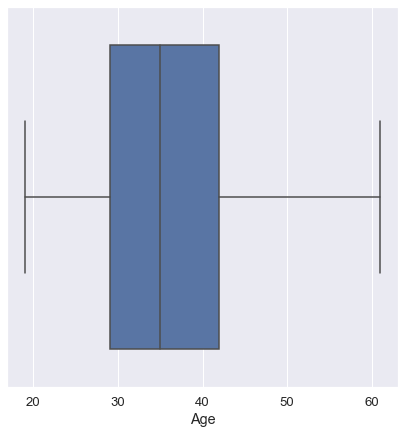

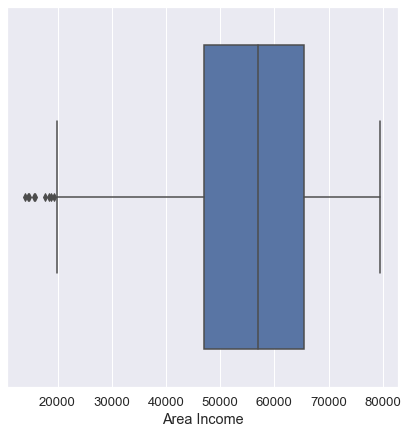

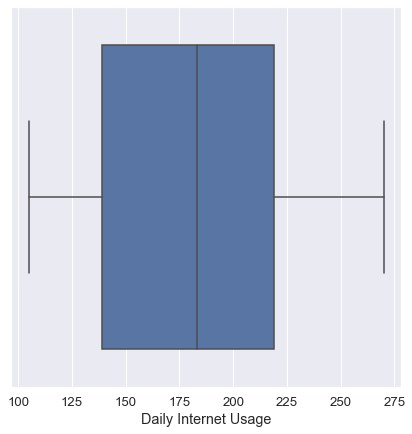

In [11]:
for col in df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]:
    sns.boxplot(df[col])
    plt.show()

In [12]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'Month', 'Day',
       'Hour'],
      dtype='object')

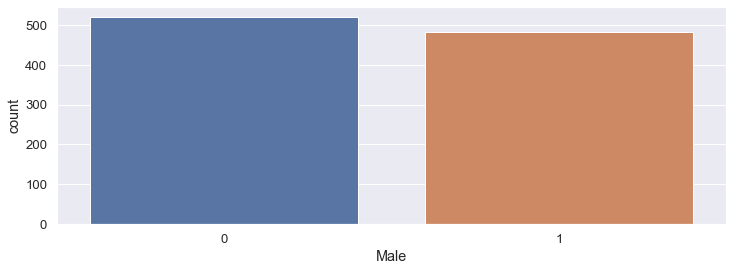

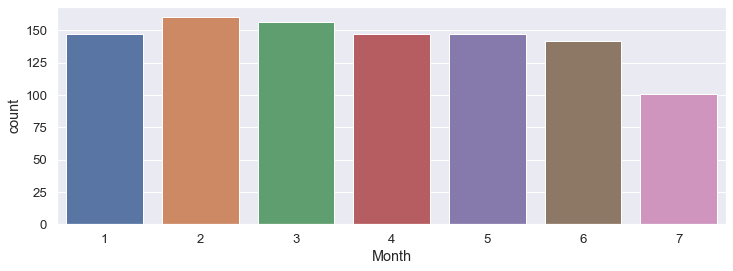

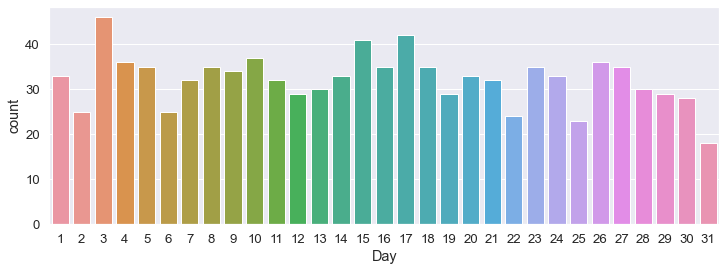

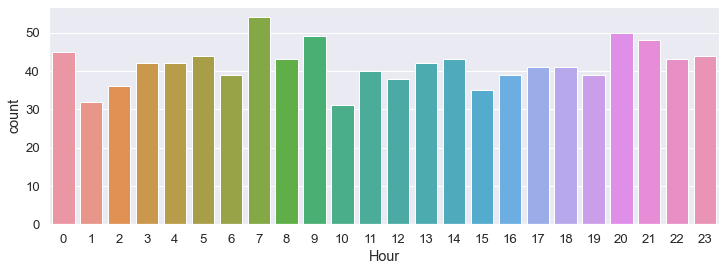

In [13]:
for col in df[['Male', 'Month', 'Day', 'Hour']]:
    plt.figure(figsize=(12,4))
    sns.countplot(df[col])
    plt.show()

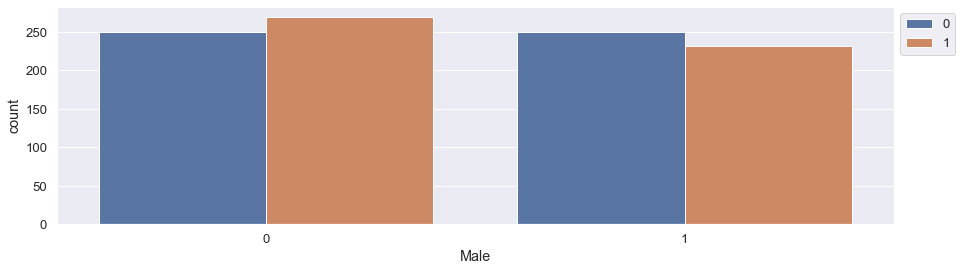

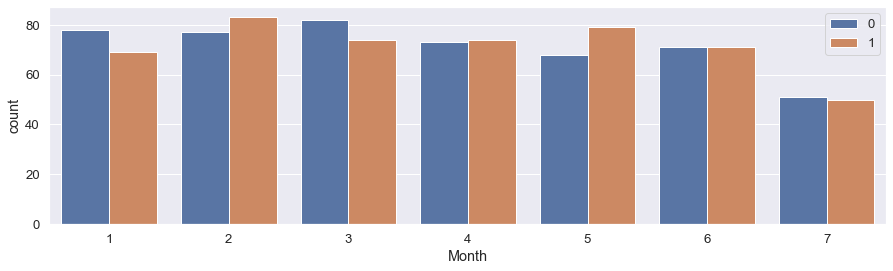

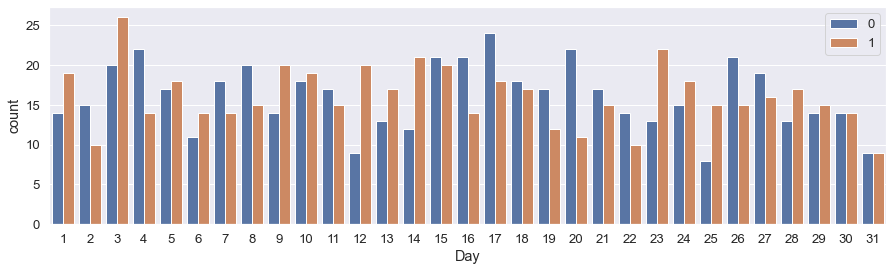

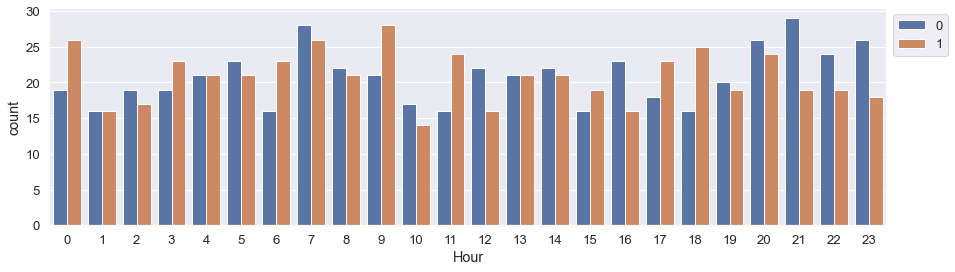

In [14]:
for col in df[['Male', 'Month', 'Day', 'Hour']]:
    if col !='Clicked on Ad':
        plt.figure(figsize=(15,4))
        sns.countplot(df[col], hue=df['Clicked on Ad'])
        plt.legend(bbox_to_anchor=(1,1))
        plt.show()

<AxesSubplot:xlabel='Age', ylabel='Daily Internet Usage'>

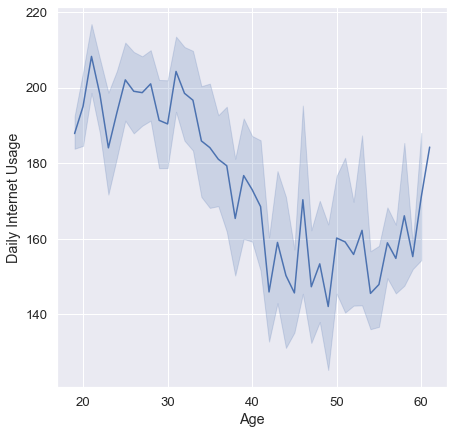

In [15]:
sns.lineplot(x=df['Age'], y=df['Daily Internet Usage'])

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

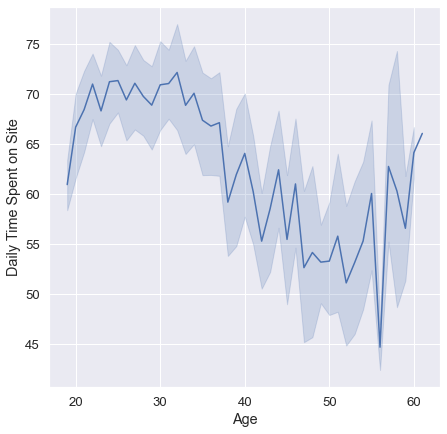

In [16]:
sns.lineplot(x=df['Age'], y=df['Daily Time Spent on Site'])

<AxesSubplot:>

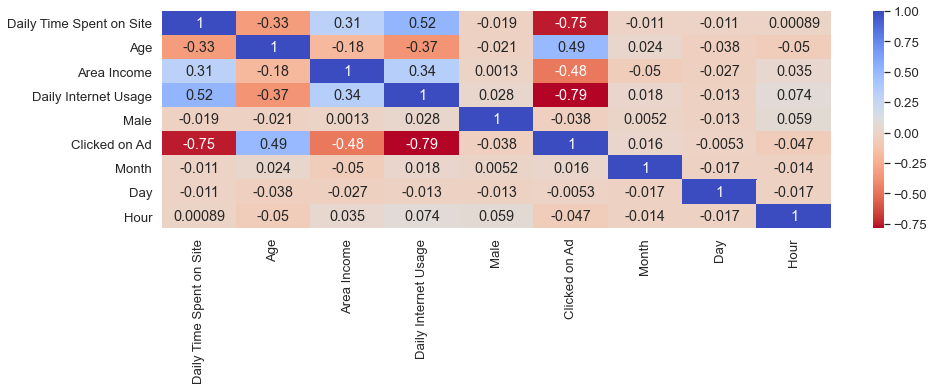

In [17]:
plt.figure(figsize=(15,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm_r')

In [18]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,0
1,80.23,31,68441.85,193.77,1,0,4,4,1
2,69.47,26,59785.94,236.50,0,0,3,13,20
3,74.15,29,54806.18,245.89,1,0,1,10,2
4,68.37,35,73889.99,225.58,0,0,6,3,3


In [19]:
df_copy = df[['Age', 'Daily Time Spent on Site']]
df_copy.head()

,Age,Daily Time Spent on Site
0,35,68.95
1,31,80.23
2,26,69.47
3,29,74.15
4,35,68.37


In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copy)

### Elbow Method

In [21]:
scores = []
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    scores.append(model.inertia_)
scores

[1999.9999999999982,
 963.1134347118592,
 679.8014057774548,
 499.18091753485425,
 402.34076586740173,
 342.0994892797386,
 283.49036317490885,
 247.4625491622363,
 220.05958835038717,
 193.98357539534044]

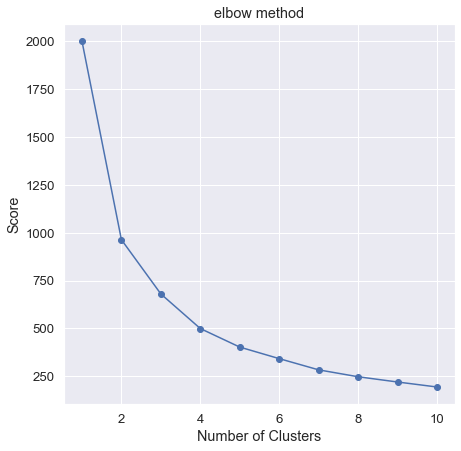

In [22]:
plt.plot(range(1,11), scores, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('elbow method')
plt.show()

### KMeans

In [23]:
model = KMeans(n_clusters=4)
model.fit(scaled_data)
cluster = model.predict(scaled_data)
# cluster

In [24]:
centroid = model.cluster_centers_
centroid

array([[ 0.01756774,  0.91622424],
       [ 0.01777603, -1.29359132],
       [-1.04965429,  0.43866795],
       [ 1.48564812, -0.61521531]])

In [25]:
df_copy['cluster'] = cluster

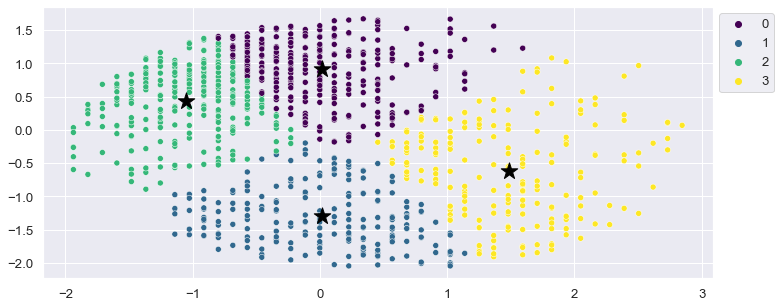

In [26]:
plt.figure(figsize=(12,5))
sns.scatterplot(scaled_data[:, 0], scaled_data[:, 1], hue=cluster, palette='viridis')
plt.scatter(centroid[:, 0], centroid[:, 1],s=300, marker='*', c='black')
plt.legend(bbox_to_anchor=(1,1), loc=(2))

In [27]:
df_copy

,Age,Daily Time Spent on Site,cluster
0,35,68.95,0
1,31,80.23,0
2,26,69.47,2
3,29,74.15,2
4,35,68.37,0
...,...,...,...
995,30,72.97,2
996,45,51.30,3
997,51,51.63,3
998,19,55.55,2


In [28]:
df['Cluster'] = cluster

In [29]:
df[df['Cluster']==0]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour,Cluster
0,68.95,35,61833.90,256.09,0,0,3,27,0,0
1,80.23,31,68441.85,193.77,1,0,4,4,1,0
4,68.37,35,73889.99,225.58,0,0,6,3,3,0
6,88.91,33,53852.85,208.36,0,0,1,28,20,0
11,83.07,37,62491.01,230.87,1,0,5,8,8,0
...,...,...,...,...,...,...,...,...,...,...
981,76.58,46,41884.64,258.26,0,0,1,3,16,0
983,82.79,32,54429.17,234.81,1,0,2,24,10,0
985,72.88,44,64011.26,125.12,0,1,4,21,19,0
988,89.71,48,51501.38,204.40,1,0,2,17,7,0


In [30]:
df[df['Cluster']==1]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour,Cluster
14,42.95,33,30976.00,143.56,0,1,3,24,9,1
16,55.39,37,23936.86,129.41,0,1,1,30,19,1
18,54.70,36,31087.54,118.39,1,1,2,13,7,1
24,41.39,41,68962.32,167.22,0,1,6,13,17,1
26,48.53,28,38067.08,134.14,1,1,2,8,10,1
...,...,...,...,...,...,...,...,...,...,...
982,54.37,38,72196.29,140.77,0,1,6,25,18,1
990,35.79,44,33813.08,165.62,1,1,4,20,13,1
991,38.96,38,36497.22,140.67,1,1,7,21,16,1
994,43.70,28,63126.96,173.01,0,1,4,4,3,1


In [31]:
df[df['Cluster']==2]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour,Cluster
2,69.47,26,59785.94,236.50,0,0,3,13,20,2
3,74.15,29,54806.18,245.89,1,0,1,10,2,2
5,59.99,23,59761.56,226.74,1,0,5,19,14,2
8,74.53,30,68862.00,221.51,1,0,4,18,9,2
9,69.88,20,55642.32,183.82,1,0,7,11,1,2
...,...,...,...,...,...,...,...,...,...,...
986,76.44,28,59967.19,232.68,1,0,4,6,17,2
989,70.96,31,55187.85,256.40,0,0,6,26,7,2
993,64.20,27,66200.96,227.63,1,0,2,11,23,2
995,72.97,30,71384.57,208.58,1,1,2,11,21,2


In [32]:
df[df['Cluster']==3]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour,Cluster
7,66.00,48,24593.33,131.76,1,1,3,7,1,3
10,47.64,49,45632.51,122.02,0,1,3,16,20,3
12,69.57,48,51636.92,113.12,1,1,6,3,1,3
22,41.49,52,32635.70,164.83,0,1,5,20,8,3
27,51.95,52,58295.82,129.23,0,1,7,19,8,3
...,...,...,...,...,...,...,...,...,...,...
976,61.84,45,46024.29,105.63,1,1,5,5,11,3
980,67.26,57,25682.65,168.41,1,1,5,27,5,3
987,63.37,43,43155.19,105.04,1,1,3,23,12,3
996,51.30,45,67782.17,134.42,1,1,4,22,2,3


In [33]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour,Cluster
0,68.95,35,61833.90,256.09,0,0,3,27,0,0
1,80.23,31,68441.85,193.77,1,0,4,4,1,0
2,69.47,26,59785.94,236.50,0,0,3,13,20,2
3,74.15,29,54806.18,245.89,1,0,1,10,2,2
4,68.37,35,73889.99,225.58,0,0,6,3,3,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,2,11,21,2
996,51.30,45,67782.17,134.42,1,1,4,22,2,3
997,51.63,51,42415.72,120.37,1,1,2,1,17,3
998,55.55,19,41920.79,187.95,0,0,3,24,2,2


### Agglomerative Clustering (Hierarchical)

In [34]:
model = AgglomerativeClustering(n_clusters=4)
cluster = model.fit_predict(scaled_data)
cluster

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 3, 0, 1, 2, 1, 2, 3, 2, 3, 1, 1,
       0, 3, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1,
       1, 0, 1, 3, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 3, 2,
       1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 1, 3, 1, 1, 3, 1, 2, 2, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 3, 3, 1, 2, 1, 2, 0, 1, 3, 3, 1, 1, 0, 2,
       2, 1, 0, 2, 2, 2, 1, 3, 1, 2, 2, 3, 0, 0, 0, 0, 0, 0, 1, 3, 0, 1,
       1, 3, 2, 2, 1, 3, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 3,
       0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 3,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 3, 1, 0, 2, 2, 2,
       3, 1, 2, 0, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 3, 1, 1, 1, 3, 0,
       1, 1, 1, 3, 2, 2, 0, 1, 3, 0, 1, 2, 0, 1, 1, 2, 3, 1, 1, 1, 1, 0,
       3, 0, 1, 1, 2, 1, 0, 3, 1, 1, 1, 2, 3, 1, 1, 1, 0, 1, 2, 3, 0, 1,
       1, 3, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 1, 1,

<AxesSubplot:>

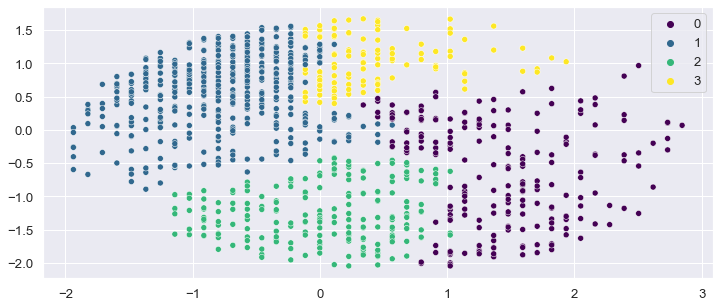

In [35]:
plt.figure(figsize=(12,5))
sns.scatterplot(scaled_data[:, 0], scaled_data[:, 1], hue=cluster, palette='viridis')